In [ ]:
# https://github.com/Pankaj-Str/MachineLearning/tree/main/08%20Day%20-%20SVM
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report , accuracy_score

In [22]:
# create a simple dataset 6 email 
# format : [supicious_words_count, email_length, label]
X = np.array([
    [1,520], # normal email
    [2,480], # normal email
    [3,450], # normal email - (a bit longer)
    [8,120], # spam email  - sort + many suspicious words
    [10,100], # spam email
    [12,80]   # spam email
])

y = np.array([0, 0, 0, 1, 1, 1]) # 0 for normal, 1 for spam

In [23]:
print(X.shape)

(6, 2)


In [24]:
# scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 0 -> mean
# 1 -> 1 std deviation
print(np.round(X_scaled, 2))

[[-1.19  1.18]
 [-0.95  0.98]
 [-0.71  0.82]
 [ 0.48 -0.89]
 [ 0.95 -0.99]
 [ 1.43 -1.1 ]]


In [25]:
# train the SVM model
# kernel = 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'
model = SVC(
    kernel='rbf',
    C = 1.0,
    gamma = 'scale'# auto - adjusts
)

model.fit(X_scaled, y)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [26]:
# predictions 
y_pred = model.predict(X_scaled)
print("Classification Report:\n", classification_report(y, y_pred))
print("Accuracy:", accuracy_score(y, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

Accuracy: 1.0


In [27]:
# add new email for testing
new_email = np.array([[5, 100]]) # 5 suspicious words, 300
new_email_scaled = scaler.transform(new_email)
new_pred = model.predict(new_email_scaled)

print("New Email Prediction (0=Normal, 1=Spam):", new_pred[0])

if new_pred[0] == 1:
    print("The new email is predicted as: SPAM")
else:
    print("The new email is predicted as: NORMAL")

New Email Prediction (0=Normal, 1=Spam): 1
The new email is predicted as: SPAM


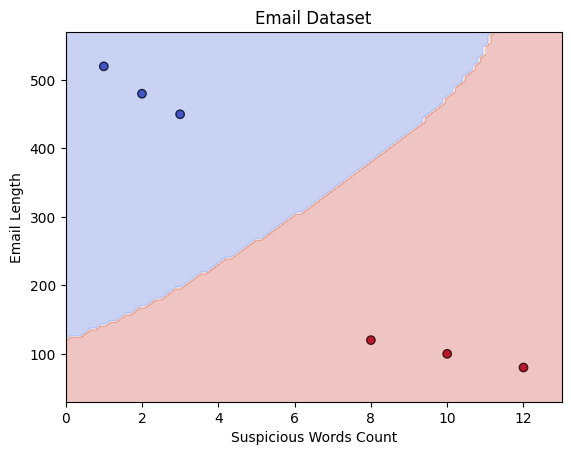

In [35]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')

# decision boundary visualization
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 50, X[:, 1].max() + 50
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.xlabel('Suspicious Words Count')
plt.ylabel('Email Length')
plt.title('Email Dataset')
plt.show()